# HEART_DISEASE_PREDICTION

In [1]:
#THIS IS A CLASSIFICATION PROBLEM 
# WE WANT 95% ACCURACY
# FETURES OF OUR DATA ARE :

In [2]:
%matplotlib inline

In [3]:
# import for EDA :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# modelling:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
# model_selection:
from sklearn.model_selection import train_test_split
# Scoring:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay

In [4]:
# import data:
df =pd.read_csv("Datasets/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

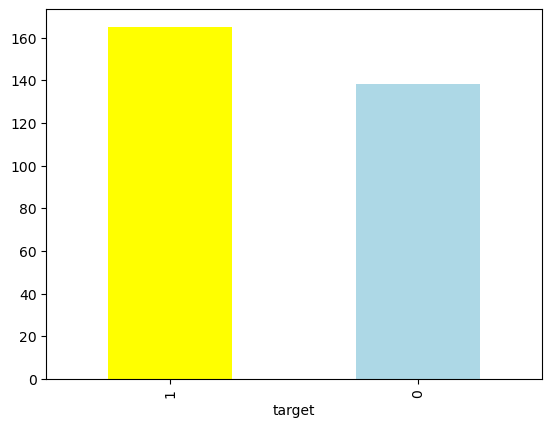

In [7]:
%matplotlib inline
df["target"].value_counts().plot(kind ="bar",color=["yellow","lightblue"])
plt.show();

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


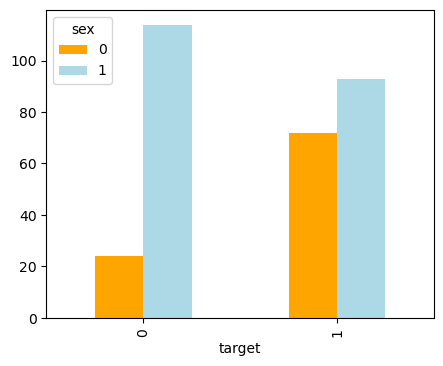

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize= (5,4),color =["orange","lightblue"])
plt.show();
# plt.title("")
#plt.label("")
#plt.xlabel("")
#plt.ylabel("")
#plt.legend("")

C:\Users\SAHIL\AppData\Local\Temp\ipykernel_26640\1785466420.py:12: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("P","NP")


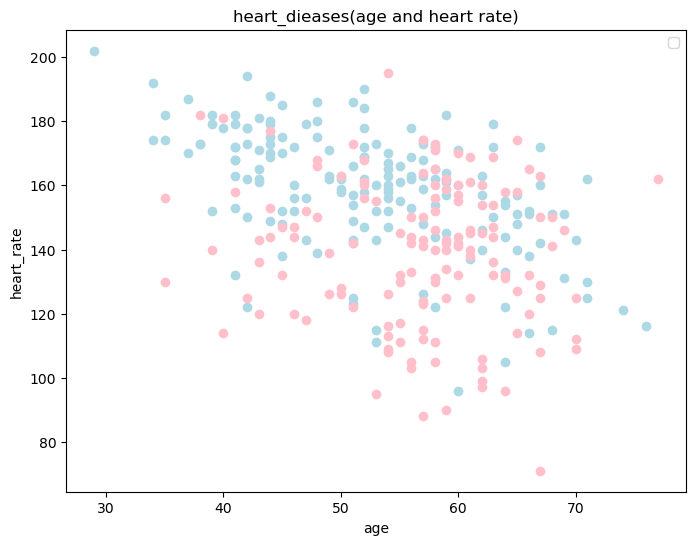

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c= ["lightblue"])
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c=["pink"])
# add info:
plt.title("heart_dieases(age and heart rate)")
plt.xlabel("age")
plt.ylabel("heart_rate")
plt.legend("P","NP")
plt.show();

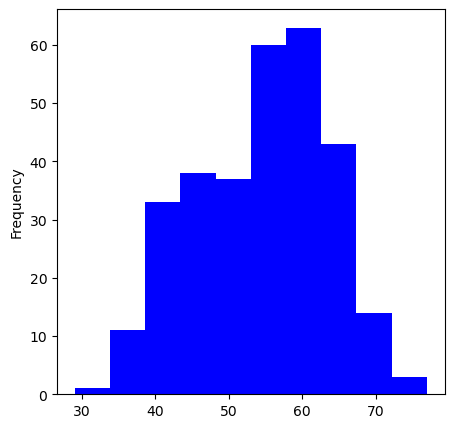

In [13]:
df["age"].plot(kind="hist",figsize=(5,5),color=["blue"])
plt.show();

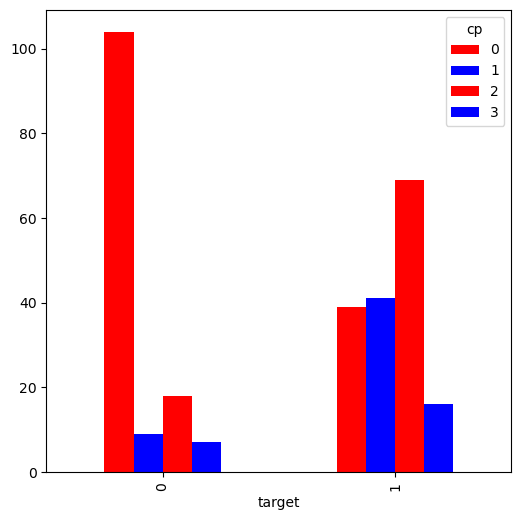

In [14]:
pd.crosstab(df.target,df.cp).plot(kind="bar",figsize=(6,6),color=["red","blue"])
plt.show();

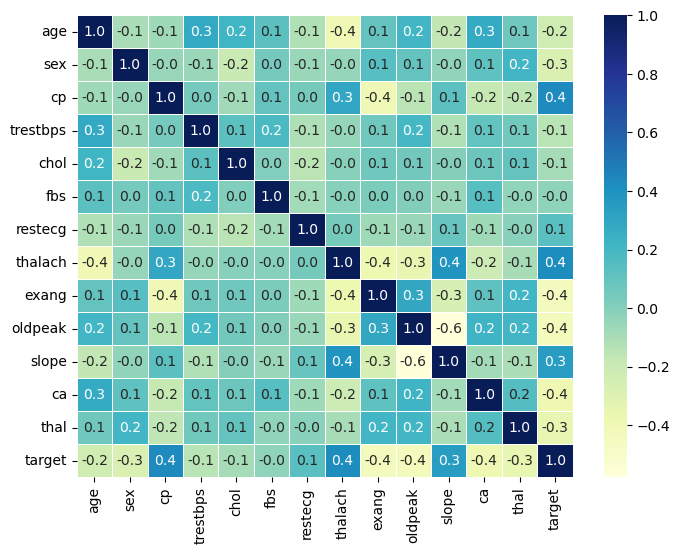

In [15]:
com = df.corr()
fig,ax = plt.subplots(figsize=(8,6))
ax =sns.heatmap(com,annot=True,
                linewidths=0.5,
                fmt=".1f",
               cmap="YlGnBu")
plt.show();


In [16]:
# divide into X(features) and Y(labels)
x = df.drop("target",axis=1) 
y = df["target"]

In [17]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
x_train.shape

(242, 13)

In [19]:
x_test.shape

(61, 13)

In [20]:
# models
models = {"LogisticRegression ":LogisticRegression(),
         "KNN": KNeighborsClassifier()}
def fit_and_score(model,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in model.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [21]:
ms = fit_and_score(models, x_train, x_test, y_train, y_test)
ms

C:\Users\SAHIL\OneDrive\Desktop\DS\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression ': 0.8852459016393442, 'KNN': 0.6885245901639344}

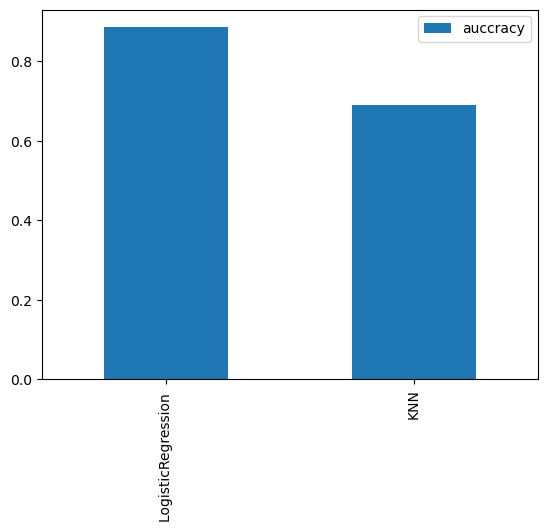

In [22]:
model_compare = pd.DataFrame(ms,index=["auccracy"])
model_compare.T.plot.bar()
plt.show();

In [23]:
train_score = []
test_score = []
#knn
knn = KNeighborsClassifier()
neighbors = range(1,21,1)
for i in neighbors :
    knn.set_params(n_neighbors=i)

    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))

    test_score.append(knn.score(x_test,y_test))
    

In [24]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

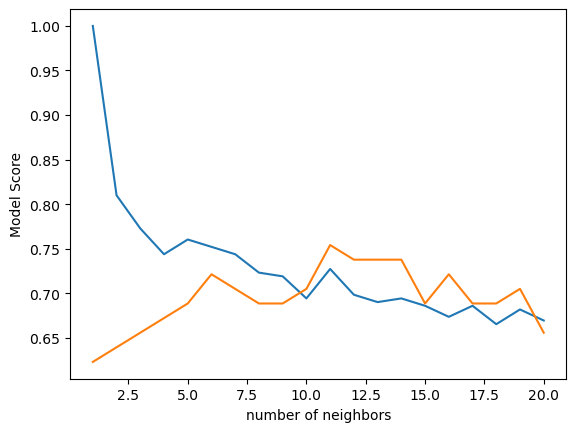

In [26]:
plt.plot(neighbors,train_score,label ="train_score")
plt.plot(neighbors,test_score,label ="test_score")
plt.xlabel("number of neighbors")
plt.ylabel("Model Score")
plt.show();

In [27]:
# grid for lR
log_reg_grid = {"C":(10,9,8,7,6,5,4,3,2,1),
               "solver":["liblinear","lbfgs"]}
lr = LogisticRegression ()

In [28]:
# RandomizedCV:
np.random_seed=42
from sklearn.model_selection import RandomizedSearchCV
rs =  RandomizedSearchCV(
     estimator=lr,  
      param_distributions=log_reg_grid,
     cv = 5,
     n_iter=20,
     verbose= True)
rs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\SAHIL\OneDrive\Desktop\DS\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SAHIL\OneDrive\Desktop\DS\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sci

,estimator,LogisticRegression()
,param_distributions,"{'C': (10, ...), 'solver': ['liblinear', 'lbfgs']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [29]:
print("Best Parameters:", rs.best_params_)
print(f"Best Cross-Validation Score:,{ rs.best_score_*100 :.2f}")
print("Best Model:", rs.best_estimator_)


Best Parameters: {'solver': 'liblinear', 'C': 1}
Best Cross-Validation Score:,82.22
Best Model: LogisticRegression(C=1, solver='liblinear')


In [30]:
score = rs.score(x_test,y_test)
print(f"score:{score*100:.2f}")

score:86.89


In [31]:
# gridCV:

# Evalating the model using diffrent methods :

In [32]:


# y_preds:
y_pred = rs.predict(x_test)

In [33]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

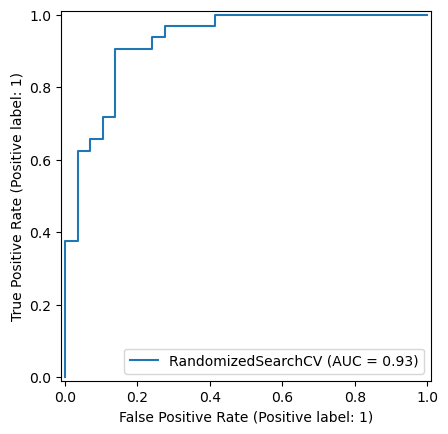

In [34]:
# Scikit-Learn 1.2.0 or later
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=rs, 
                               X=x_test, 
                               y=y_test); 
plt.show()

In [35]:
# confussion martrix:
cm = confusion_matrix(y_test,y_pred)

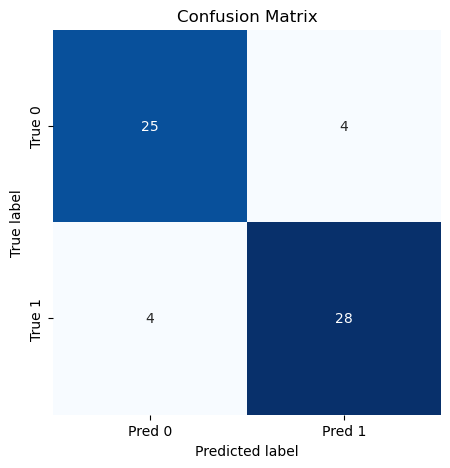

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,
            annot=True,        # show numbers inside boxes
            fmt='d',           # integer format
            cmap='Blues',      # color scheme
            cbar= False,        # remove color bar
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show();


In [37]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [38]:
# use crossvalidation :
clf = LogisticRegression(C=1,solver="liblinear")

In [39]:
ccv = cross_val_score(clf,x,y,cv=5,scoring="accuracy")

In [40]:
score_ccv = f"{ccv.mean()*100:.2f}"

In [41]:
score_ccv

'82.15'

In [42]:
ccv_per = cross_val_score(clf,x,y,cv=5,scoring="precision")
ccv_per

array([0.78947368, 0.90322581, 0.85294118, 0.83333333, 0.71052632])

In [43]:
ccv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
ccv_recall

array([0.90909091, 0.84848485, 0.87878788, 0.90909091, 0.81818182])

In [44]:
ccv_per.mean()

np.float64(0.817900063251107)

In [45]:
ccv_recall.mean()

np.float64(0.8727272727272727)

In [46]:
score_mertic = pd.DataFrame({"accuracy":ccv ,"precision":ccv_per,"Recall":ccv_recall})
score_mertic

,accuracy,precision,Recall
0,0.819672,0.789474,0.909091
1,0.868852,0.903226,0.848485
2,0.852459,0.852941,0.878788
3,0.850000,0.833333,0.909091
4,0.716667,0.710526,0.818182


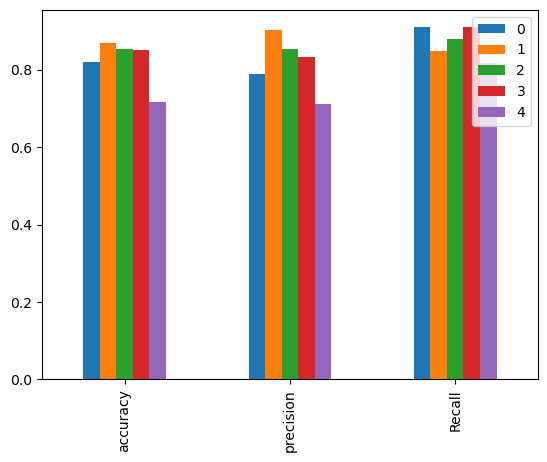

In [52]:
score_mertic.T.plot.bar()
plt.show()

In [53]:
clf = LogisticRegression(C=0.22,solver="liblinear")

In [54]:
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.22
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [55]:
clf.coef_

array([[ 0.00347023, -0.88604515,  0.66859726, -0.0115866 , -0.00168851,
         0.04664866,  0.32384028,  0.02467882, -0.61973164, -0.57250982,
         0.46193734, -0.6443364 , -0.6882988 ]])

In [56]:
feature_dict = dict(zip(df.columns,(clf.coef_[0])))

In [57]:
feature_dict

{'age': np.float64(0.003470234516536983),
 'sex': np.float64(-0.8860451463178608),
 'cp': np.float64(0.6685972646195689),
 'trestbps': np.float64(-0.01158659971824775),
 'chol': np.float64(-0.0016885103317543161),
 'fbs': np.float64(0.046648662302037805),
 'restecg': np.float64(0.323840275813706),
 'thalach': np.float64(0.024678818885486734),
 'exang': np.float64(-0.6197316351532762),
 'oldpeak': np.float64(-0.5725098154091561),
 'slope': np.float64(0.46193734148963095),
 'ca': np.float64(-0.644336400844044),
 'thal': np.float64(-0.6882988020584877)}

In [58]:
fet_data = pd.DataFrame(feature_dict,index=[0])

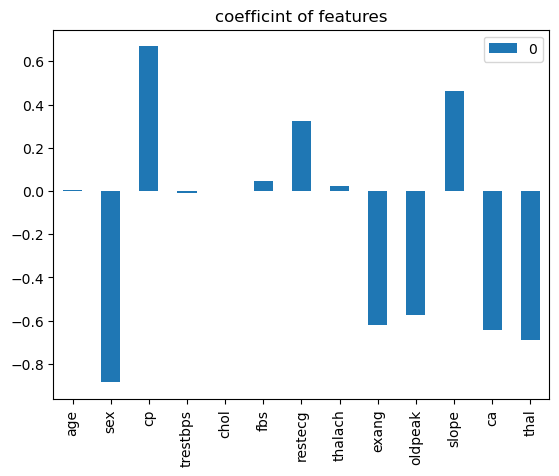

In [59]:
fet_data.T.plot.bar(title ="coefficint of features")
plt.show()

In [60]:
cro_data = pd.crosstab(df["sex"],df["target"])
cro_data

target,0,1
sex,,
0,24,72
1,114,93


In [61]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
